In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

ruta_zebra = "positives/"
ruta_nozebra ="negativo/"

ruta_Augzebra = "aug/positives/"
ruta_Augnozebra ="aug/negativo/"

In [2]:
crosswalk_training=[]
sizeW = 320
sizeH = 180

for img in os.listdir(ruta_zebra):
  img = cv2.imread(os.path.join(ruta_zebra,img))/255.0
  crosswalk_training.append(img)

In [3]:
crosswalk_training[1].shape

(180, 320, 3)

In [4]:
for img in os.listdir(ruta_Augzebra):
  img = cv2.imread(os.path.join(ruta_Augzebra,img))/255.0
  crosswalk_training.append(img)

In [5]:
# Etiquetas para imagenes donde existen lineas de zebra (1)
etiquetas_zebra = np.repeat(1,len(crosswalk_training))
print(len(etiquetas_zebra))
print(etiquetas_zebra)

1718
[1 1 1 ... 1 1 1]


In [6]:
nozebra_training=[]
for img in os.listdir(ruta_nozebra):
  img = cv2.imread(os.path.join(ruta_nozebra,img))/255.0
  nozebra_training.append(img)

In [7]:
for img in os.listdir(ruta_Augnozebra):
  img = cv2.imread(os.path.join(ruta_Augnozebra,img))/255.0
  nozebra_training.append(img)

In [8]:
len(nozebra_training)

1664

In [9]:
# Etiquetas para imagenes donde no existen lineas de zebra(0)
etiquetas_nozebra = np.repeat(0,len(nozebra_training))
print(len(etiquetas_nozebra))
print(etiquetas_nozebra)

1664
[0 0 0 ... 0 0 0]


In [10]:
#Concatenacion del dataset
crosswalk_training += nozebra_training

In [11]:
len(crosswalk_training)

3382

In [12]:
crosswalk_training = np.array(crosswalk_training)


In [13]:
print(len(crosswalk_training))

3382


In [14]:
crosswalk_training = crosswalk_training.astype('float32')
print(len(crosswalk_training))


3382


In [15]:
crosswalk_training.shape

(3382, 180, 320, 3)

In [16]:
nro_imagen=1719
img = crosswalk_training[nro_imagen]
print(img.shape)
img = (np.expand_dims(img,0))
print (img.shape)

(180, 320, 3)
(1, 180, 320, 3)


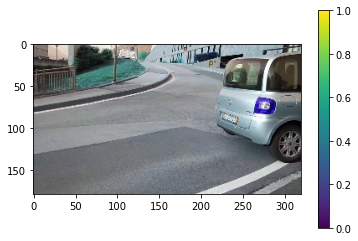

In [17]:
plt.figure()
plt.imshow(crosswalk_training[nro_imagen])
plt.colorbar()
plt.grid(False)
plt.show();

In [18]:
class_names=['','Pazo Peatonal']

In [19]:
# Concatenacion de las etiquetas
labels = np.concatenate([etiquetas_zebra, etiquetas_nozebra])
print(len(labels))
print(labels)
Labels = np.array(labels)
print(labels.shape)

3382
[1 1 1 ... 0 0 0]
(3382,)


In [20]:
from sklearn.model_selection import train_test_split
from numpy.random import seed


In [21]:
from sklearn.utils import check_random_state

random_state = check_random_state(42)
permutation = random_state.permutation(crosswalk_training.shape[0])

In [22]:
crosswalk_training = crosswalk_training[permutation]
labels = labels[permutation]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(crosswalk_training, labels, test_size=0.20, random_state=42)


print( X_train.shape,"\n", X_test.shape,"\n", y_train.shape,"\n", y_test.shape)

(2705, 180, 320, 3) 
 (677, 180, 320, 3) 
 (2705,) 
 (677,)


In [24]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(sizeH,sizeW,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(190, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [25]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-4),
   loss='binary_crossentropy',
   metrics = ['acc']
   )


In [26]:
history = model.fit(X_train,y_train,epochs=12,
                    validation_data=(X_test,y_test),
                    batch_size=16)

Epoch 1/12
170/170 [==============================] - 20s 82ms/step - loss: 0.5365 - acc: 0.7258 - val_loss: 0.2527 - val_acc: 0.8759
Epoch 2/12
170/170 [==============================] - 13s 75ms/step - loss: 0.2241 - acc: 0.9046 - val_loss: 0.3713 - val_acc: 0.8449
Epoch 3/12
170/170 [==============================] - 13s 75ms/step - loss: 0.1446 - acc: 0.9466 - val_loss: 0.1021 - val_acc: 0.9675
Epoch 4/12
170/170 [==============================] - 13s 75ms/step - loss: 0.1195 - acc: 0.9548 - val_loss: 0.0867 - val_acc: 0.9705
Epoch 5/12
170/170 [==============================] - 13s 78ms/step - loss: 0.0879 - acc: 0.9680 - val_loss: 0.1282 - val_acc: 0.9424
Epoch 6/12
170/170 [==============================] - 13s 78ms/step - loss: 0.0782 - acc: 0.9683 - val_loss: 0.0680 - val_acc: 0.9749
Epoch 7/12
170/170 [==============================] - 14s 81ms/step - loss: 0.0584 - acc: 0.9793 - val_loss: 0.0778 - val_acc: 0.9660
Epoch 8/12
170/170 [==============================] - 13s 79ms

In [35]:
'''plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)'''

"plt.plot(history.history['acc'], label='accuracy')\nplt.plot(history.history['val_acc'], label = 'val_accuracy')\nplt.xlabel('Epoch')\nplt.ylabel('Accuracy')\nplt.ylim([0.5, 1])\nplt.legend(loc='lower right')\n\ntest_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)"

In [36]:
'''# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
#plt.show()'''

"# summarize history for loss\nplt.plot(history.history['loss'])\nplt.plot(history.history['val_loss'])\nplt.ylabel('Loss')\nplt.xlabel('Epoch')\nplt.legend(['train', 'test'], loc='upper right')\n#plt.show()"

In [29]:
nro_imagen=312
img = crosswalk_training[nro_imagen]
print(img.shape)
img = (np.expand_dims(img,0))
print (img.shape)

(180, 320, 3)
(1, 180, 320, 3)


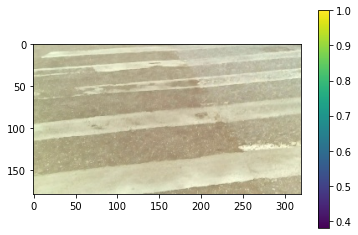

In [30]:
plt.figure()
plt.imshow(crosswalk_training[nro_imagen])
plt.colorbar()
plt.grid(False)
plt.show();

In [31]:
predictions_single = model.predict(img)
print(predictions_single)

print(np.max(predictions_single))
print(np.argmax(predictions_single))
print(class_names[int(round(np.max(predictions_single)))])
#if np.max(predictions_single) < 0.5:
 #  print( "IT IS NOT A CROSSWALK")
#else:
 #  print(" IT IS  A CROSSWALK")

[[0.99997616]]
0.99997616
0
Pazo Peatonal


In [32]:
import cv2
import imutils
# get the reference to the webcam
#camera = cv2.VideoCapture("vid/TOKYO.mp4")
#camera = cv2.VideoCapture("vid/drivingcut.mp4")
camera = cv2.VideoCapture("vid/Cycling.mp4")
#camera = cv2.VideoCapture(0)
camera_height = 1000
font = cv2.FONT_HERSHEY_SIMPLEX 

while(True):

    ret,frame = camera.read()

    frame = imutils.resize(frame, 1000)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    imgaa = cv2.resize(frame,(sizeW,sizeH))
    imga = (np.expand_dims(imgaa,0))
    predd=model.predict(imga)

    cv2.putText(frame,  
                    f' {class_names[int(round(np.max(predd)))]}',  
                    (100, 100),  
                    font, 1,  
                    (0, 255, 0),  
                    2,  
                    cv2.LINE_4)
   
    cv2.imshow('video', frame) 

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()
